In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import h5py
%matplotlib inline

/home/anshul/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
f = h5py.File("/home/anshul/git/DACPS/logging/logs0.txt", 'r', libver='latest', swmr=True)

In [10]:
move_q =  f['statistics']["ep_reward"][:]

In [11]:
move_q

array([-0.24437577, -0.16886726, -0.11844753, ...,  0.        ,
        0.        ,  0.        ], dtype=float32)

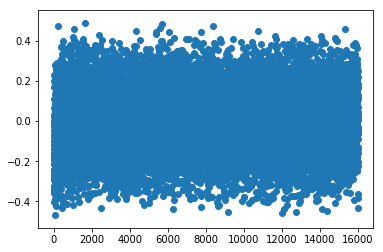

In [12]:
plt.scatter(range(16000), move_q[:16000])

In [13]:
avg_q =  f['statistics']["ep_avgq"][:]

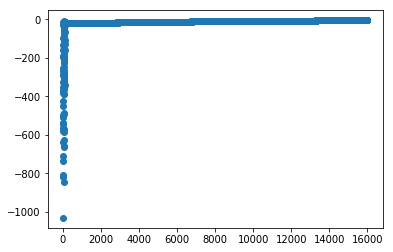

In [14]:
plt.scatter(range(16000), avg_q[:16000])